# Renewal process
___

Let $(\xi_i)$ be independent and identically distrubuted such that $\xi_i > 0$ and $F$ be its distribution function.
Define 
$$T_k = \sum_{i=1}^k \xi_i,$$
$$N_x = \sup \{ n \ge 0 \mid T_n \ge x\}, \,\, x \ge 0.$$
We call $N_x$ a *renewal process*.

Note that a renewal process is not a markov process in general.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set()

In [64]:
def renewal_process(xis):
    xs = [0]
    ys = [0]
    tk = np.cumsum(xis)
    for i, xi in enumerate(tk):
        xs += [xi, xi]
        ys += [i, i+1]
    return xs, ys

def transform_process(xis, step, x_max):
    tk = np.cumsum(xis)
    l = len(xis)
    nxs = np.linspace(0, x_max, int(x_max/step))
    nys = []
    i = 0
    for j, nx in enumerate(nxs):
        while nx >= tk[i]:
            i += 1
            if i >= l:
                return nxs[:j], nys
        nys.append(i)
    return nxs, nys

### Example 1
$P(\xi_i = 1) = 1.$

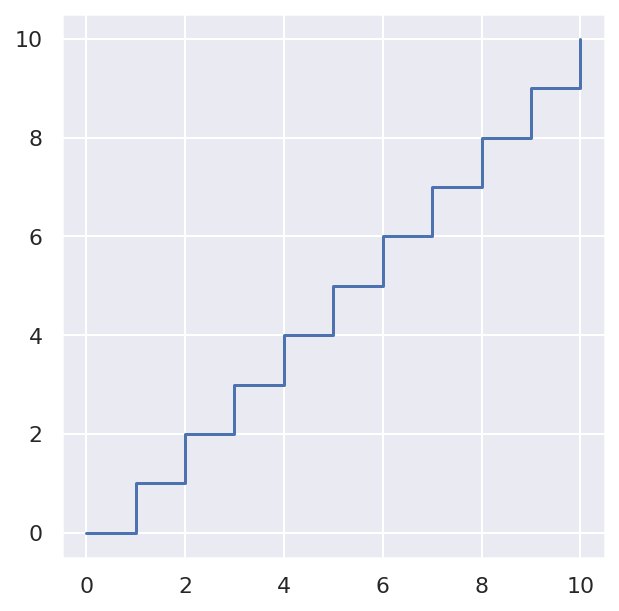

CPU times: user 250 ms, sys: 15.6 ms, total: 266 ms
Wall time: 266 ms


In [3]:
%%time
xi_num = 10
num = 1

xis = np.ones(xi_num)
xs, ys = renewal_process(xis)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal')
plt.plot(xs, ys)
plt.show()

### Example 2
If $\xi_i$ is exponentially distributed with parameter $\lambda > 0$, then $N_x$ is a Poisson process with parameter $\lambda$.

Now we set $\lambda = 1$.

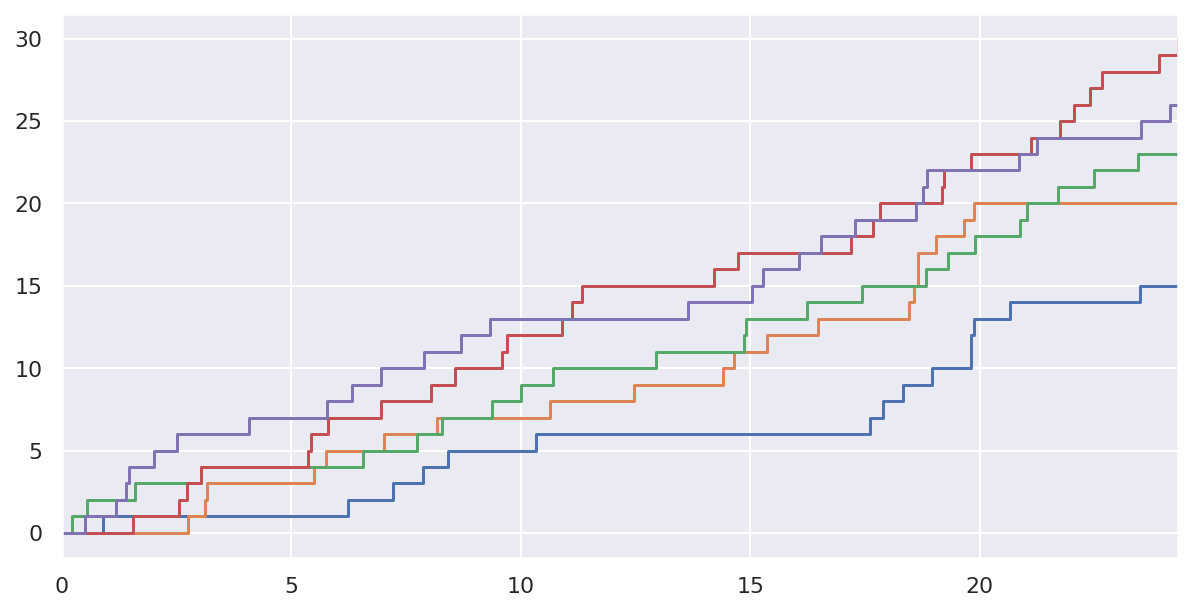

CPU times: user 281 ms, sys: 15.6 ms, total: 297 ms
Wall time: 288 ms


In [4]:
%%time
xi_num = 30
num = 5
x_min = 1e+6

plt.figure(figsize=(10, 5))
for _ in range(num):
    xis = np.random.exponential(size=xi_num)
    xs, ys = renewal_process(xis)
    x_min = min(xs[-1], x_min)
    plt.plot(xs, ys)
plt.xlim(0, x_min)
plt.show()

### Example 3
$\xi_i = B/6 + 2U + 10I$, where $B$ is a binomial distribution with parameter $p = 4/5, n = 30$, $U$ is uniformly distributed on $[0, 1]$ and $P(I = 0) = P(I = 1) = 1/2$.

Define $\mu = E\xi_i = 10$.

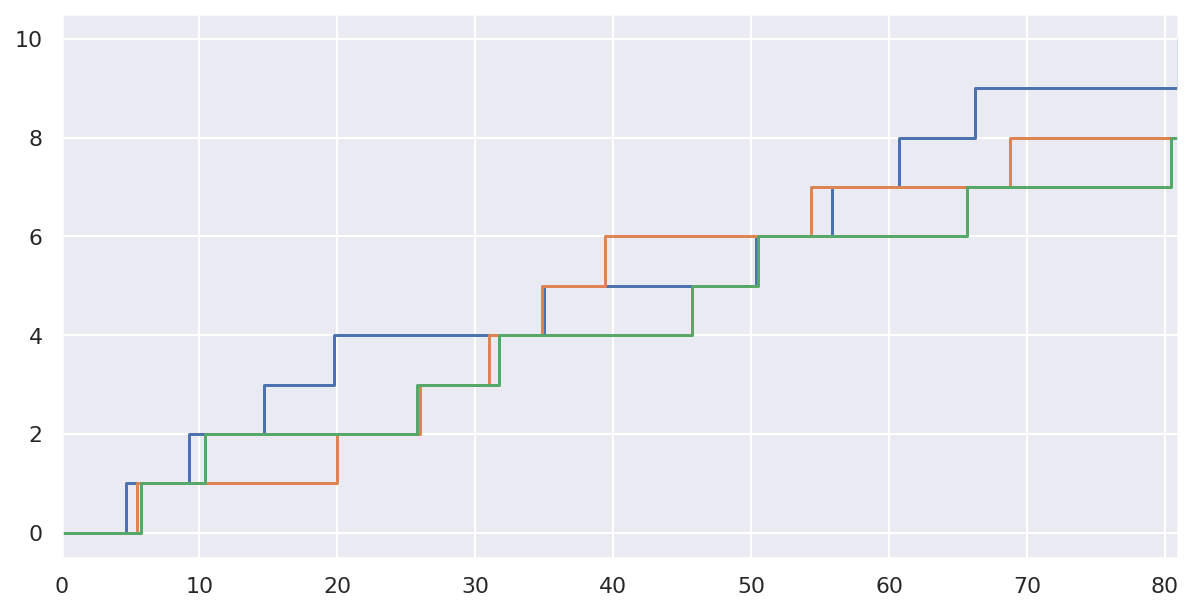

CPU times: user 281 ms, sys: 0 ns, total: 281 ms
Wall time: 278 ms


In [67]:
%%time
xi_num = 10
num = 3
x_min = 1e+6

plt.figure(figsize=(10, 5))
for _ in range(num):
    xis = np.random.binomial(n=30, p=4/5, size=xi_num) / 6 + 2 * np.random.rand(xi_num) + (np.random.rand(xi_num) < 1/2) * 10
    xs, ys = renewal_process(xis)
    x_min = min(xs[-1], x_min)
    plt.plot(xs, ys)
plt.xlim(0, x_min)
plt.show()

## Path property
___

> **Theorem**
> $$ \lim_{x \uparrow \infty} \frac{N_x}{x} = \frac{1}{\mu}.$$  
> If $\mu =\infty$, $1/\mu = 0.$

We use example 3.

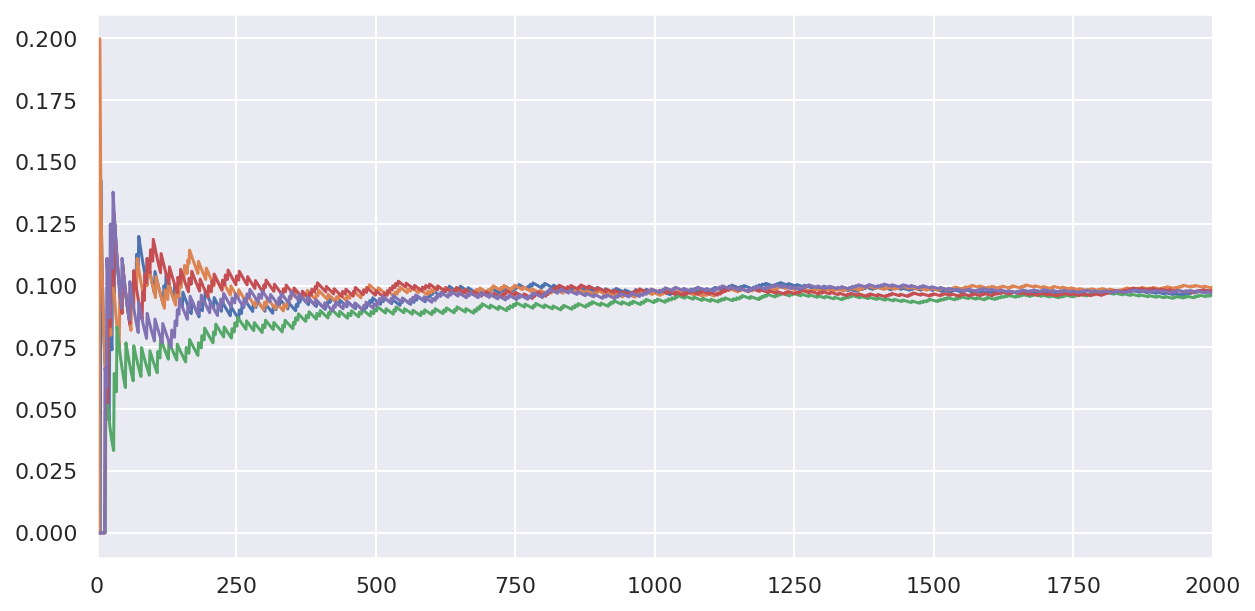

CPU times: user 297 ms, sys: 15.6 ms, total: 312 ms
Wall time: 309 ms


In [69]:
%%time
xi_num = 5000
num = 5
x_min = 2000
step = 1

plt.figure(figsize=(10, 5))
for _ in range(num):
    xis = np.random.binomial(n=30, p=4/5, size=xi_num) / 6 + 2 * np.random.rand(xi_num) + (np.random.rand(xi_num) < 1/2) * 10
    xs, ys = renewal_process(xis)
    x_min = min(xs[-1], x_min)
    xs, ys = transform_process(xis, step, x_min)
    xs = xs[1:]
    ys = ys[1:]
    ds = ys / xs
    plt.plot(xs, ds)
plt.xlim(0, x_min)
plt.show()

Define a renewal function $U(x)$ such that
$$U(x) = \sum_{k=0}^\infty F^{*k}(x) = EN_x + 1.$$

## Elementary Renewal Theorem
___

> **Theorem**
> $$\lim_{x \uparrow \infty} \frac{U(x)}{x} = \frac{1}{\mu}.$$
> And the rate of convergence is
> $$\frac{U(x)}{x} - \frac{1}{\mu} \sim \frac{E \xi^2}{2\mu^2 x}  \;\;\;\;\; x\uparrow \infty.$$

In [ ]:
%%time
xi_num = 50000
mean_num = 100
num = 5
x_min = 2000
step = 1

plt.figure(figsize=(10, 5))
for _ in range(num):
    for _ in range(mean_num):
        xis = np.random.binomial(n=30, p=4/5, size=xi_num) / 6 + 2 * np.random.rand(xi_num) + (np.random.rand(xi_num) < 1/2) * 10
        xs, ys = renewal_process(xis)
        x_min = min(xs[-1], x_min)
        xs, ys = transform_process(xis, step, x_min)
        xs = xs[1:]
        ys = ys[1:]
plt.xlim(0, x_min)
plt.show()